In [262]:
import math
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [263]:
class KNearestNeighbours:

    def __init__(self, k):
        self.k = k

    def fit(self, X, Y):
        self.X = X
        self.Y = Y

    @staticmethod
    def distance_(fst, sec):
        res = 0
        for i in range(len(fst)):
            res += (fst[i] - sec[i]) ** 2
        return math.sqrt(res)

    def predict(self, test_x):
        result = list()
        for item in test_x.values:
            distances = list()
            count = 0
            for x in self.X.values:
                distances.append((self.Y.values[count], self.distance_(item, x)))
                count += 1
            distances.sort(key=lambda x_: x_[1])
            neighbors = list()
            for i in range(self.k):
                neighbors.append(distances[i][0])
            result.append((max(set(neighbors), key=neighbors.count)))
        return result

In [264]:
my_knn = KNearestNeighbours(4)

In [265]:
dict_data = load_wine(as_frame=True)
data = dict_data['data']
data['target_class'] = dict_data['target']

In [266]:
train_data, test_data = train_test_split(data, test_size=0.3, random_state=12)
x_test, y_test = test_data.drop(columns=['target_class']), test_data['target_class']
x_train, y_train = train_data.drop(columns=['target_class']), train_data['target_class']

In [267]:
my_knn.fit(x_train, y_train)
y_predicted = my_knn.predict(x_test)
accuracy_score(y_predicted, y_test.values)

0.7407407407407407

In [268]:
visualization_data = data[['od280/od315_of_diluted_wines', 'flavanoids', 'target_class']]
data_c0 = visualization_data[visualization_data['target_class'] == 0]
x0, y0 = data_c0['od280/od315_of_diluted_wines'], data_c0['flavanoids']
data_c1 = visualization_data[visualization_data['target_class'] == 1]
x1, y1 = data_c1['od280/od315_of_diluted_wines'], data_c1['flavanoids']
data_c2 = visualization_data[visualization_data['target_class'] == 2]
x2, y2 = data_c2['od280/od315_of_diluted_wines'], data_c2['flavanoids']

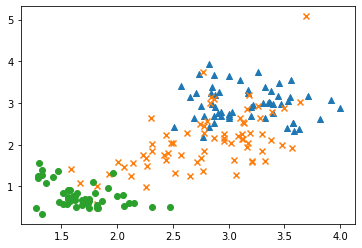

In [269]:
plt.scatter(x0, y0, marker='^')
plt.scatter(x1, y1, marker='x')
plt.scatter(x2, y2, marker='o')
plt.show()